In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('S:/NEW/Projects/KN_ETE_ML_Project/notebook/data/stud.csv')

In [3]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.shape

(1000, 8)

Checks to Perform
Missing
Duplicate
Data type
Number of unique values in each col
statistixcs of data
categorical valuies


In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
print("Categories in gender variables: ", end=" " )
print(df['gender'].unique())

print("Categories in race_ethnicity variables: ", end=" " )
print(df['race_ethnicity'].unique())

print("Categories in parental_level_of_education variables: ", end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in lunch variables: ", end=" " )
print(df['lunch'].unique())

print("Categories in test_preparation_course variables: ", end=" " )
print(df['test_preparation_course'].unique())


Categories in gender variables:  ['female' 'male']
Categories in race_ethnicity variables:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variables:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variables:  ['standard' 'free/reduced']
Categories in test_preparation_course variables:  ['none' 'completed']


In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f'We have {len(numerical_features)} numerical features: {numerical_features}')
print(f'We have {len(categorical_features)} numerical features: {categorical_features}')

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 numerical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average']  = df['total_score'] / 3

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
reading_full, math_full, writing_full

(17, 7, 14)

In [14]:
reading_less_than_20 = df[df['reading_score'] < 20]['average'].count()
math_less_than_20 = df[df['math_score'] < 20]['average'].count()
writing_less_than_20 = df[df['writing_score'] < 20]['average'].count()

reading_less_than_20, math_less_than_20, writing_less_than_20

(1, 4, 3)

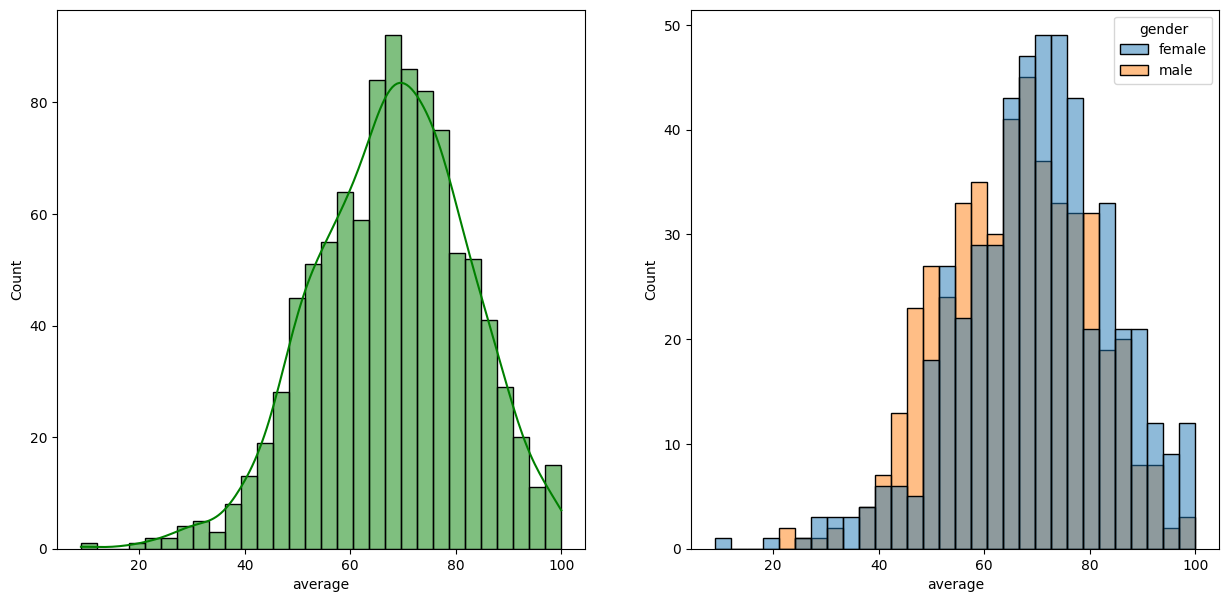

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x= 'average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x= 'average', bins=30, kde=False, hue='gender')
plt.show()

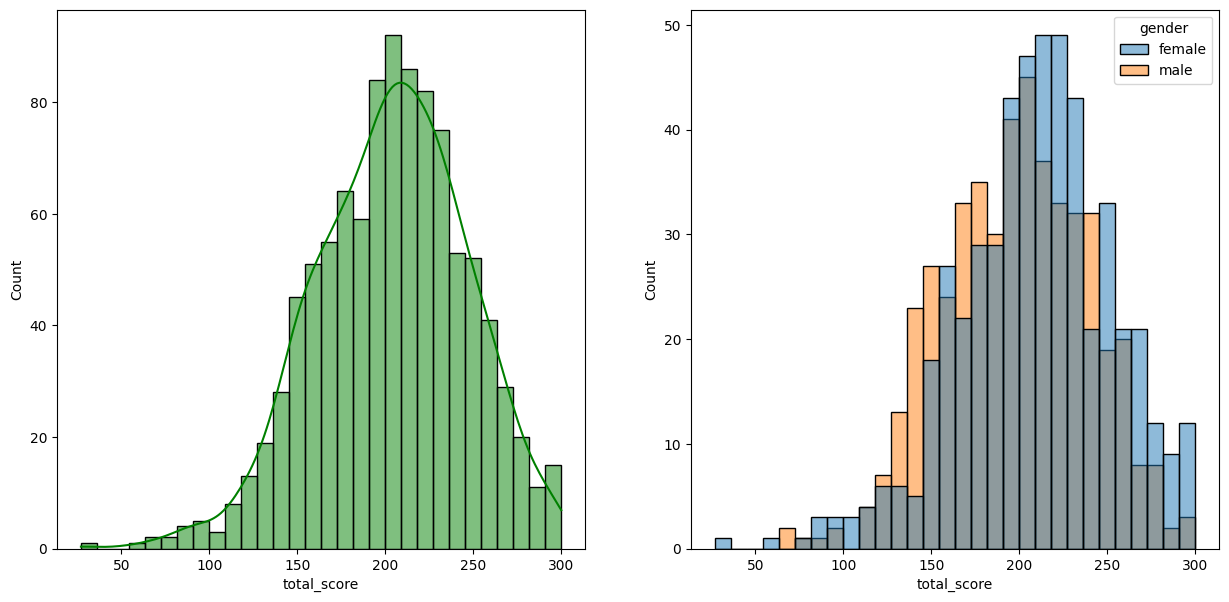

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x= 'total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x= 'total_score', bins=30, kde=False, hue='gender')
plt.show()

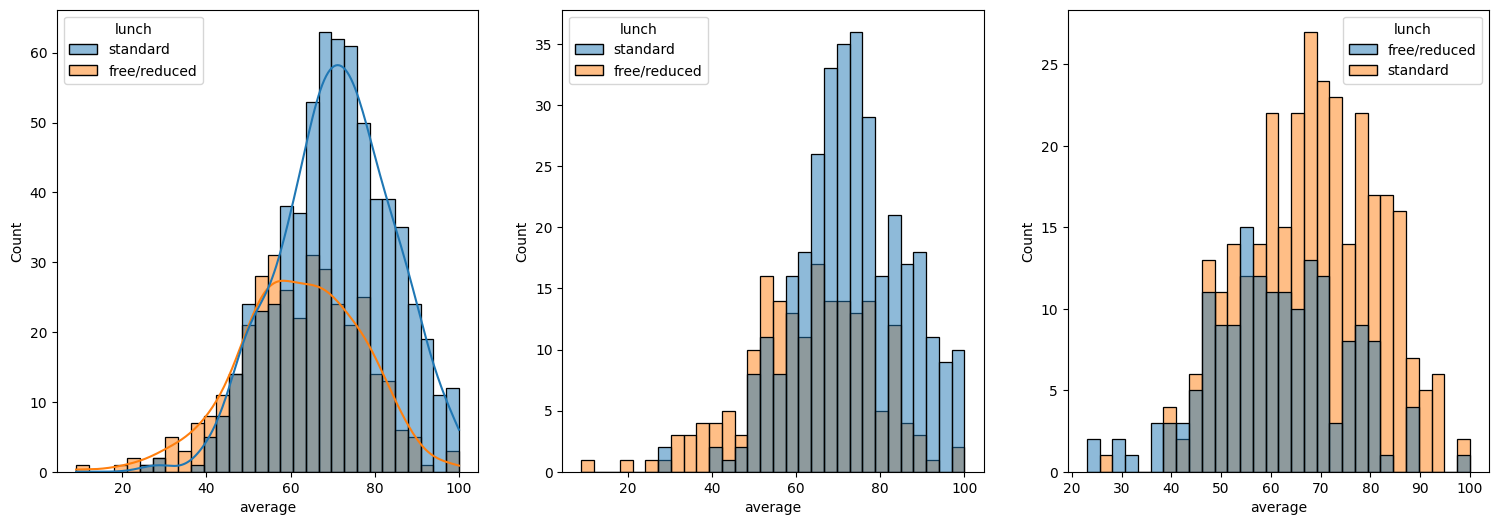

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x= 'average', bins=30, kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'female'], x= 'average', bins=30, kde=False, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'male'], x= 'average', bins=30, kde=False, hue='lunch')
plt.show()

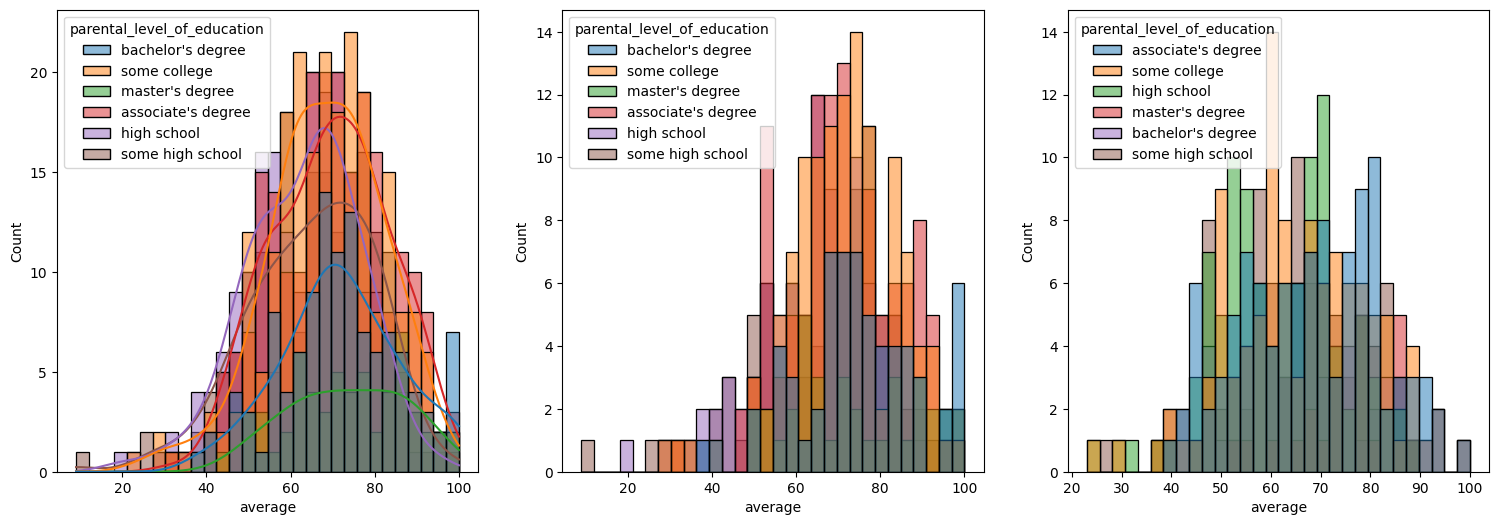

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x= 'average', bins=30, kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'female'], x= 'average', bins=30, kde=False, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'male'], x= 'average', bins=30, kde=False, hue='parental_level_of_education')
plt.show()

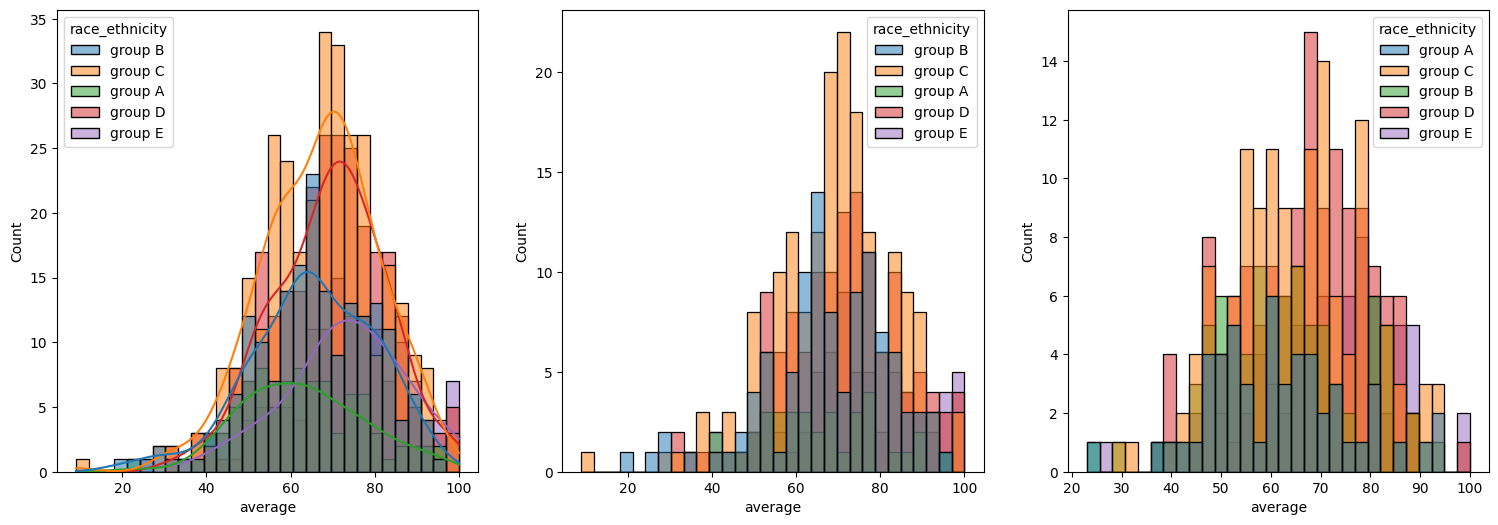

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x= 'average', bins=30, kde=True, hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df['gender'] == 'female'], x= 'average', bins=30, kde=False, hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df['gender'] == 'male'], x= 'average', bins=30, kde=False, hue='race_ethnicity')
plt.show()

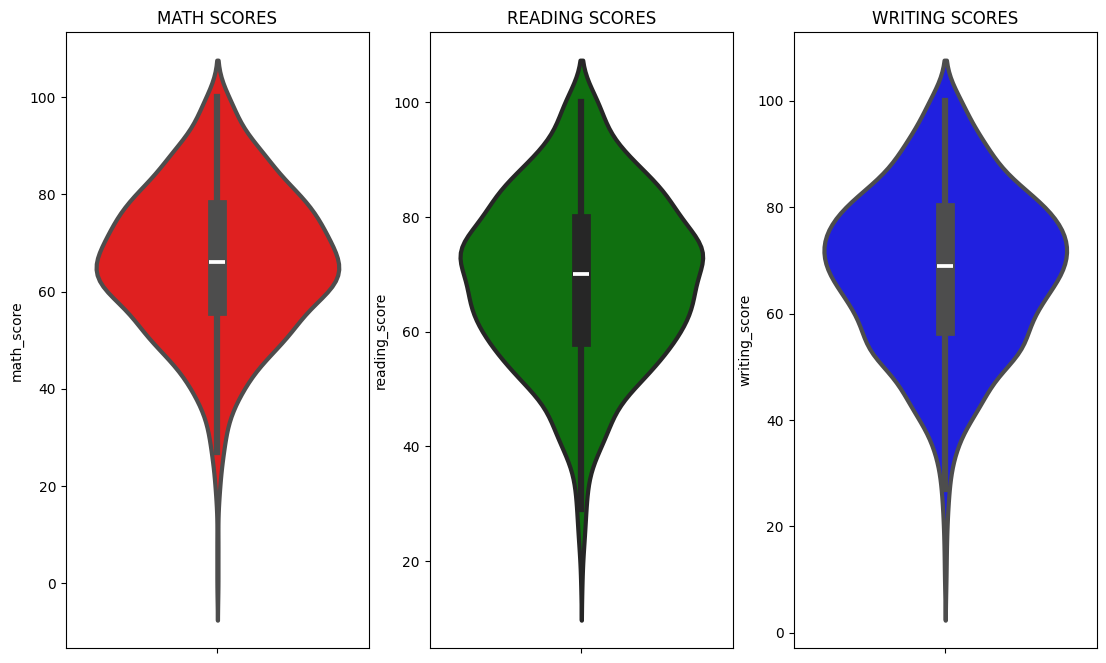

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Univariate- means studying only 1 element relation
Bivariate- means studying only 2 element relation
Multivariate- means studying multiple element relation

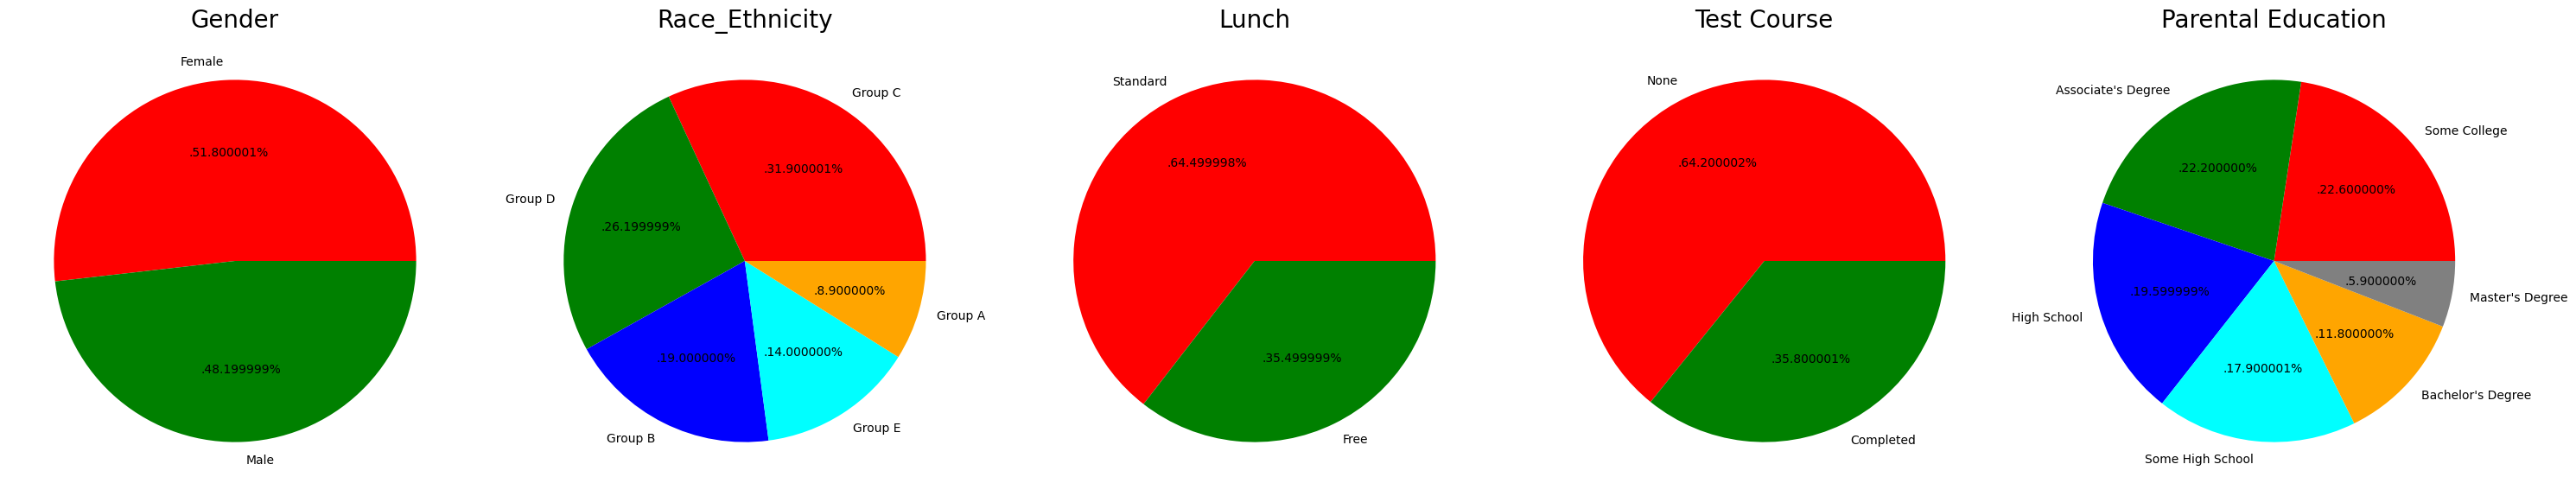

In [26]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

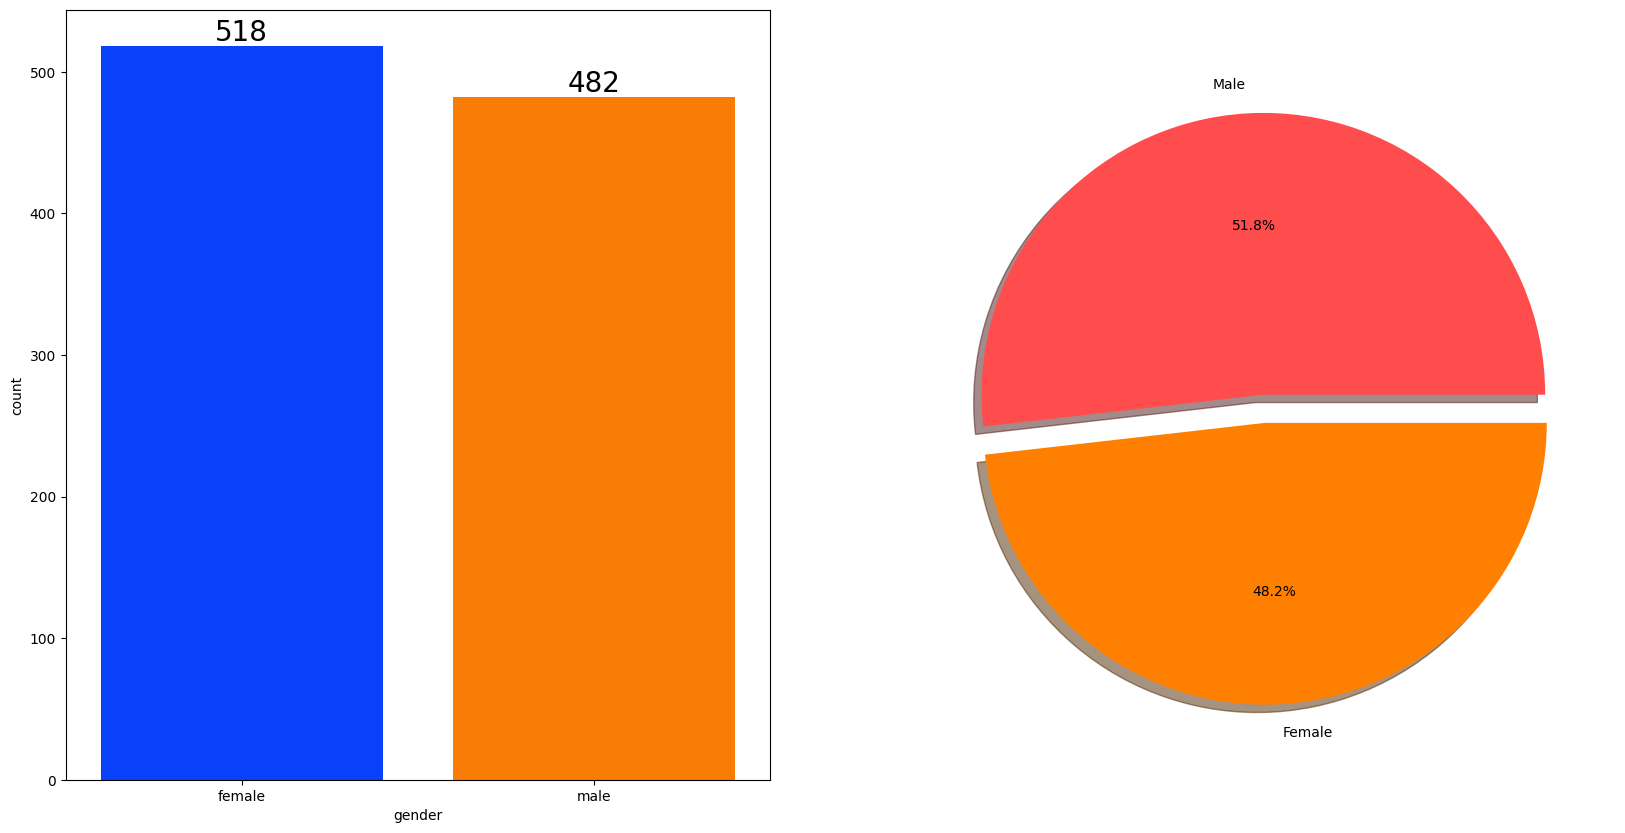

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [40]:
gender_group = df.groupby(['gender', 'race_ethnicity','parental_level_of_education','lunch', 'test_preparation_course']).mean()
gender_group

math_score  \
gender race_ethnicity parental_level_of_education lunch        test_preparation_course               
female group A        associate's degree          free/reduced none                      47.666667   
                                                  standard     completed                 60.000000   
                                                               none                      82.000000   
                      bachelor's degree           standard     none                      51.666667   
                      high school                 free/reduced completed                 54.666667   
...                                                                                            ...   
male   group E        some college                standard     completed                 87.250000   
                                                               none                      73.750000   
                      some high school            free/reduced completed                 75.500000   
                                                  standard     completed                 79.333333   
                                                               none                      74.500000   

                                                                                        reading_score  \
gender race_ethnicity parental_level_of_education lunch        test_preparation_course                  
female group A        associate's degree          free/reduced none                         64.333333   
                                                  standard     completed                    67.500000   
                                                               none                         93.000000   
                      bachelor's degree           standard     none                         60.000000   
                      high school                 free/reduced completed                    62.000000   
...                                                                                               ...   
male   group E        some college                standard     completed                    79.750000   
                                                               none                         67.750000   
                      some high school            free/reduced completed                    75.000000   
                                                  standard     completed                    72.333333   
                                                               none                         67.000000   

                                                                                        writing_score  \
gender race_ethnicity parental_level_of_education lunch        test_preparation_course                  
female group A        associate's degree          free/reduced none                         60.000000   
                                                  standard     completed                    68.000000   
                                                               none                         93.000000   
                      bachelor's degree           standard     none                         61.666667   
                      high school                 free/reduced completed                    62.000000   
...                                                                                               ...   
male   group E        some college                standard     completed                    74.500000   
                                                               none                         63.333333   
                      some high school            free/reduced completed                    69.500000   
                                                  standard     completed                    70.500000   
                                                               none                         59.750000   

                             

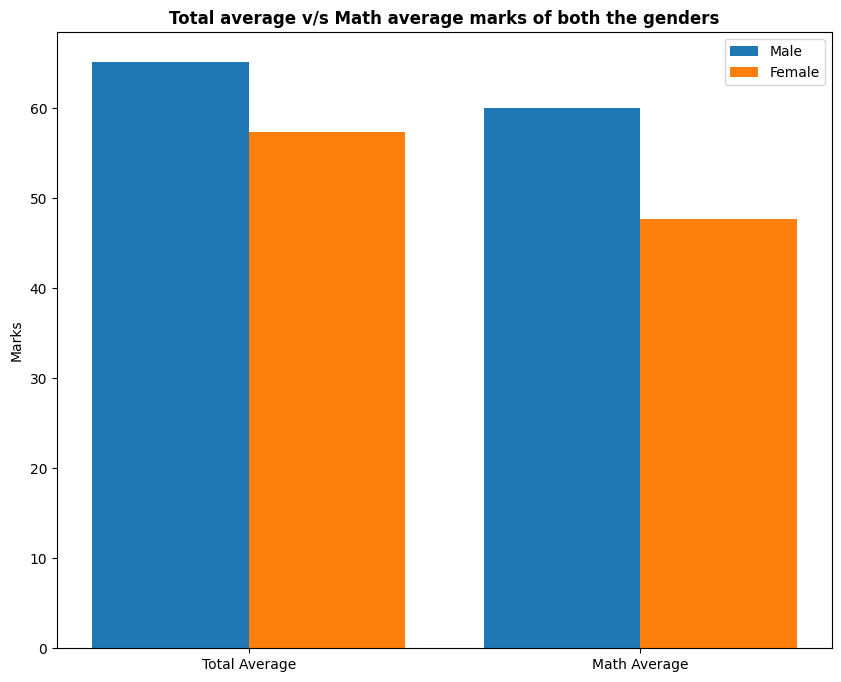

In [42]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

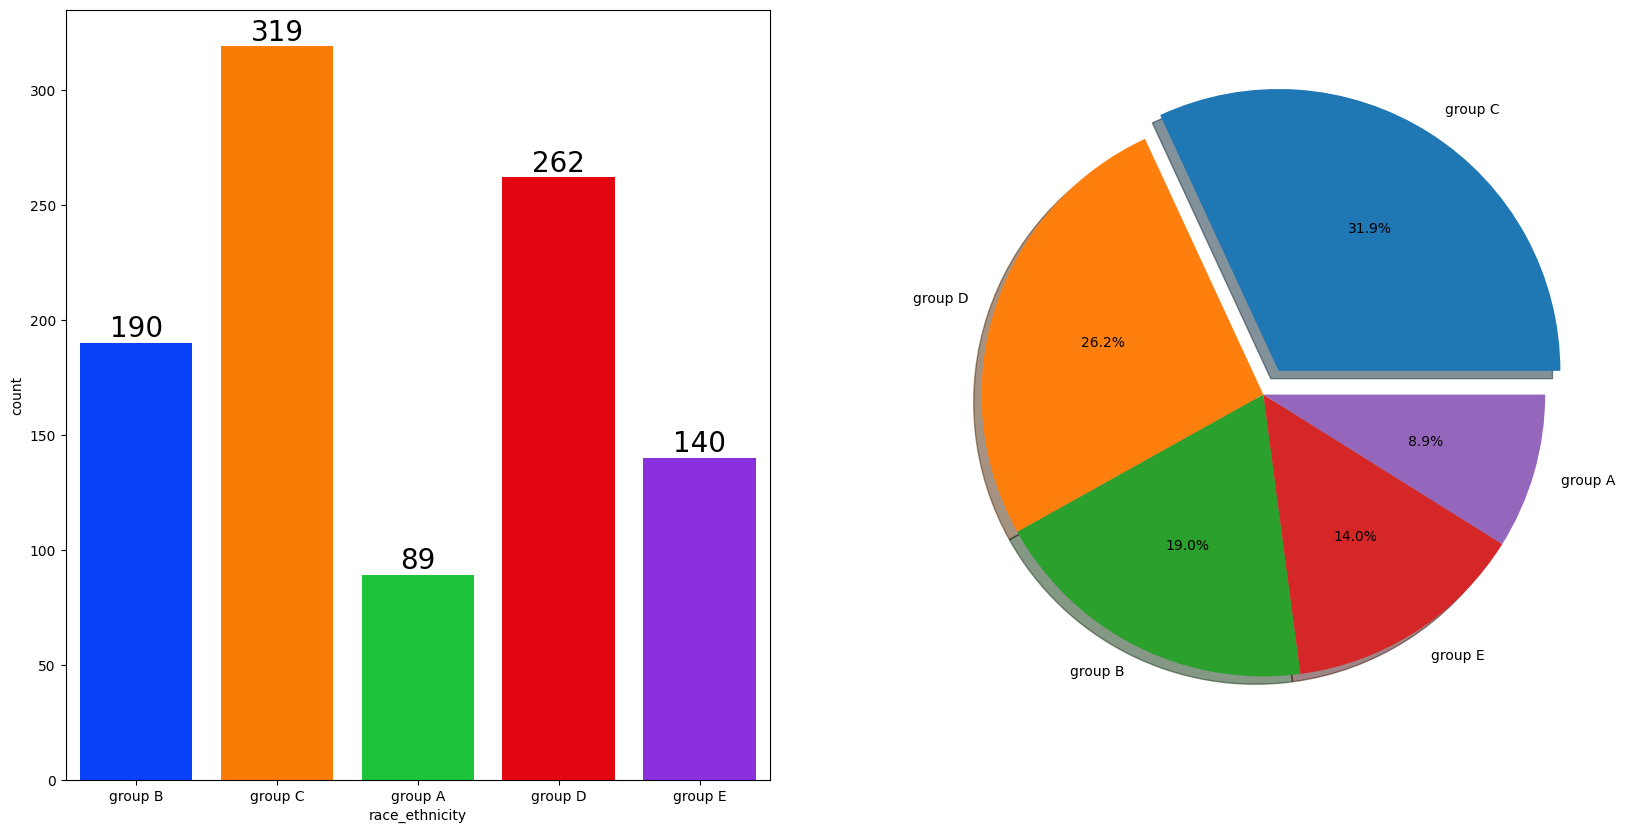

In [44]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()  

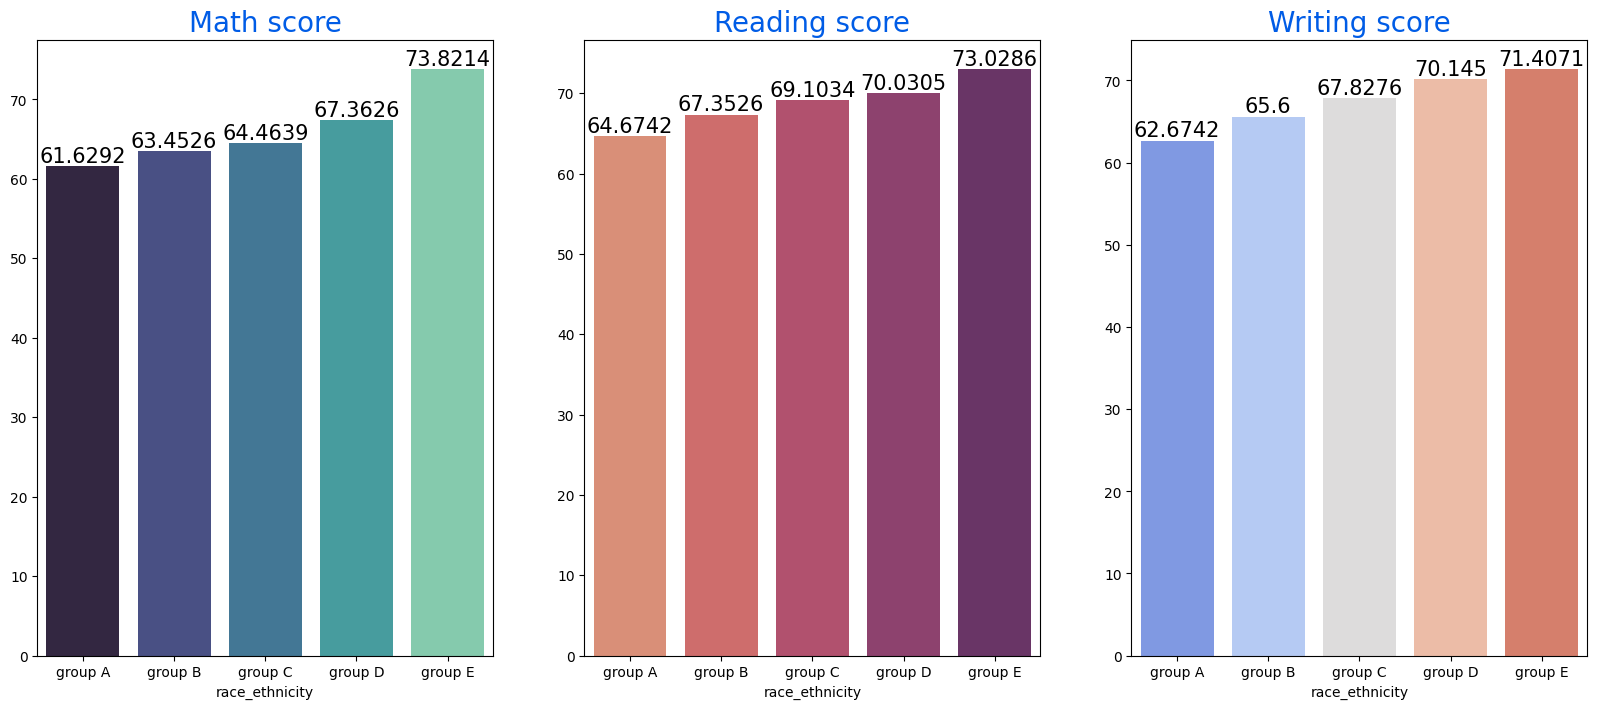

In [46]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

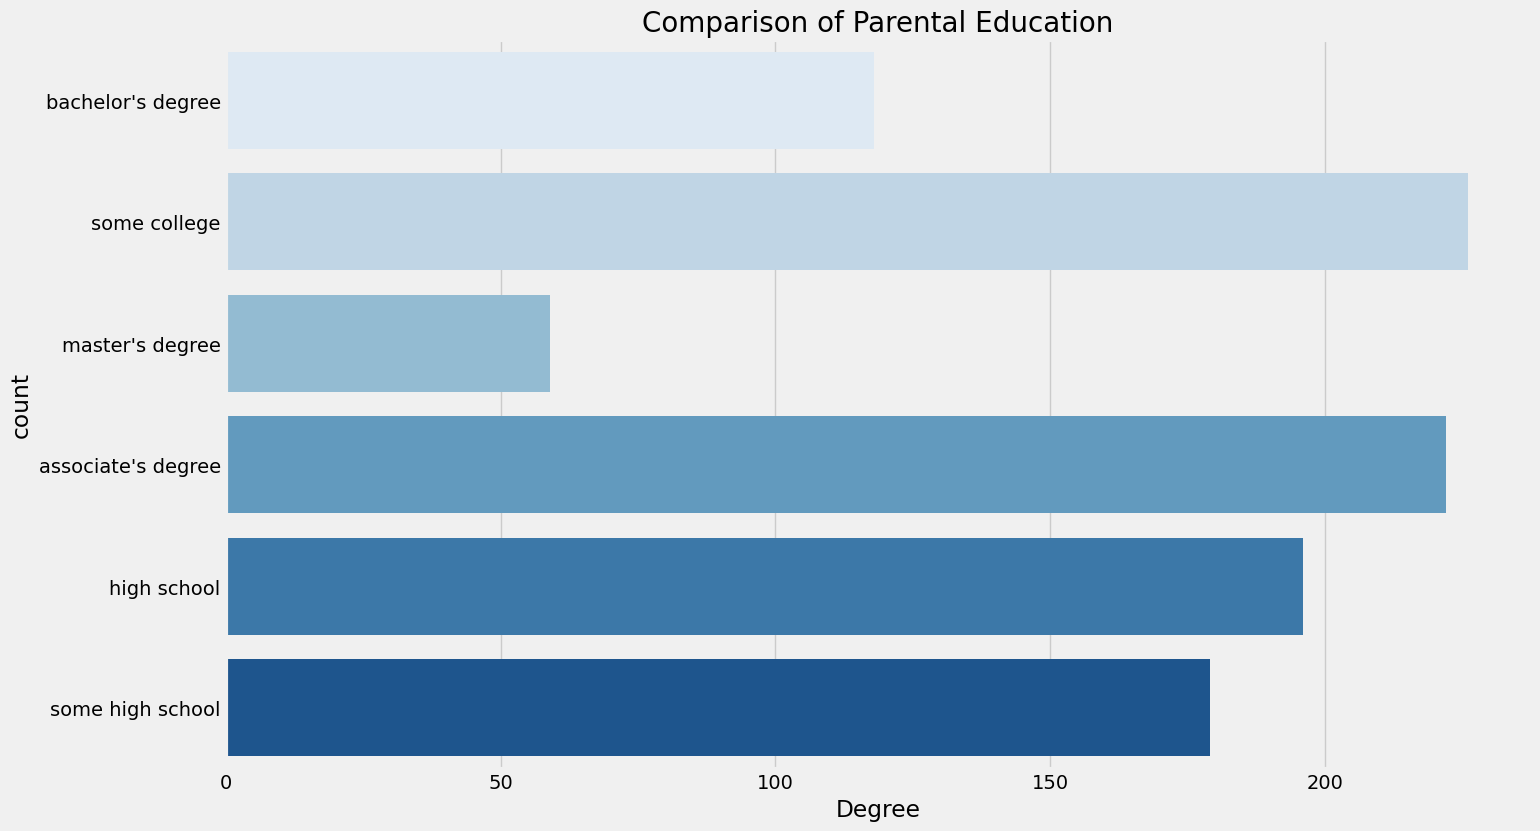

In [48]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

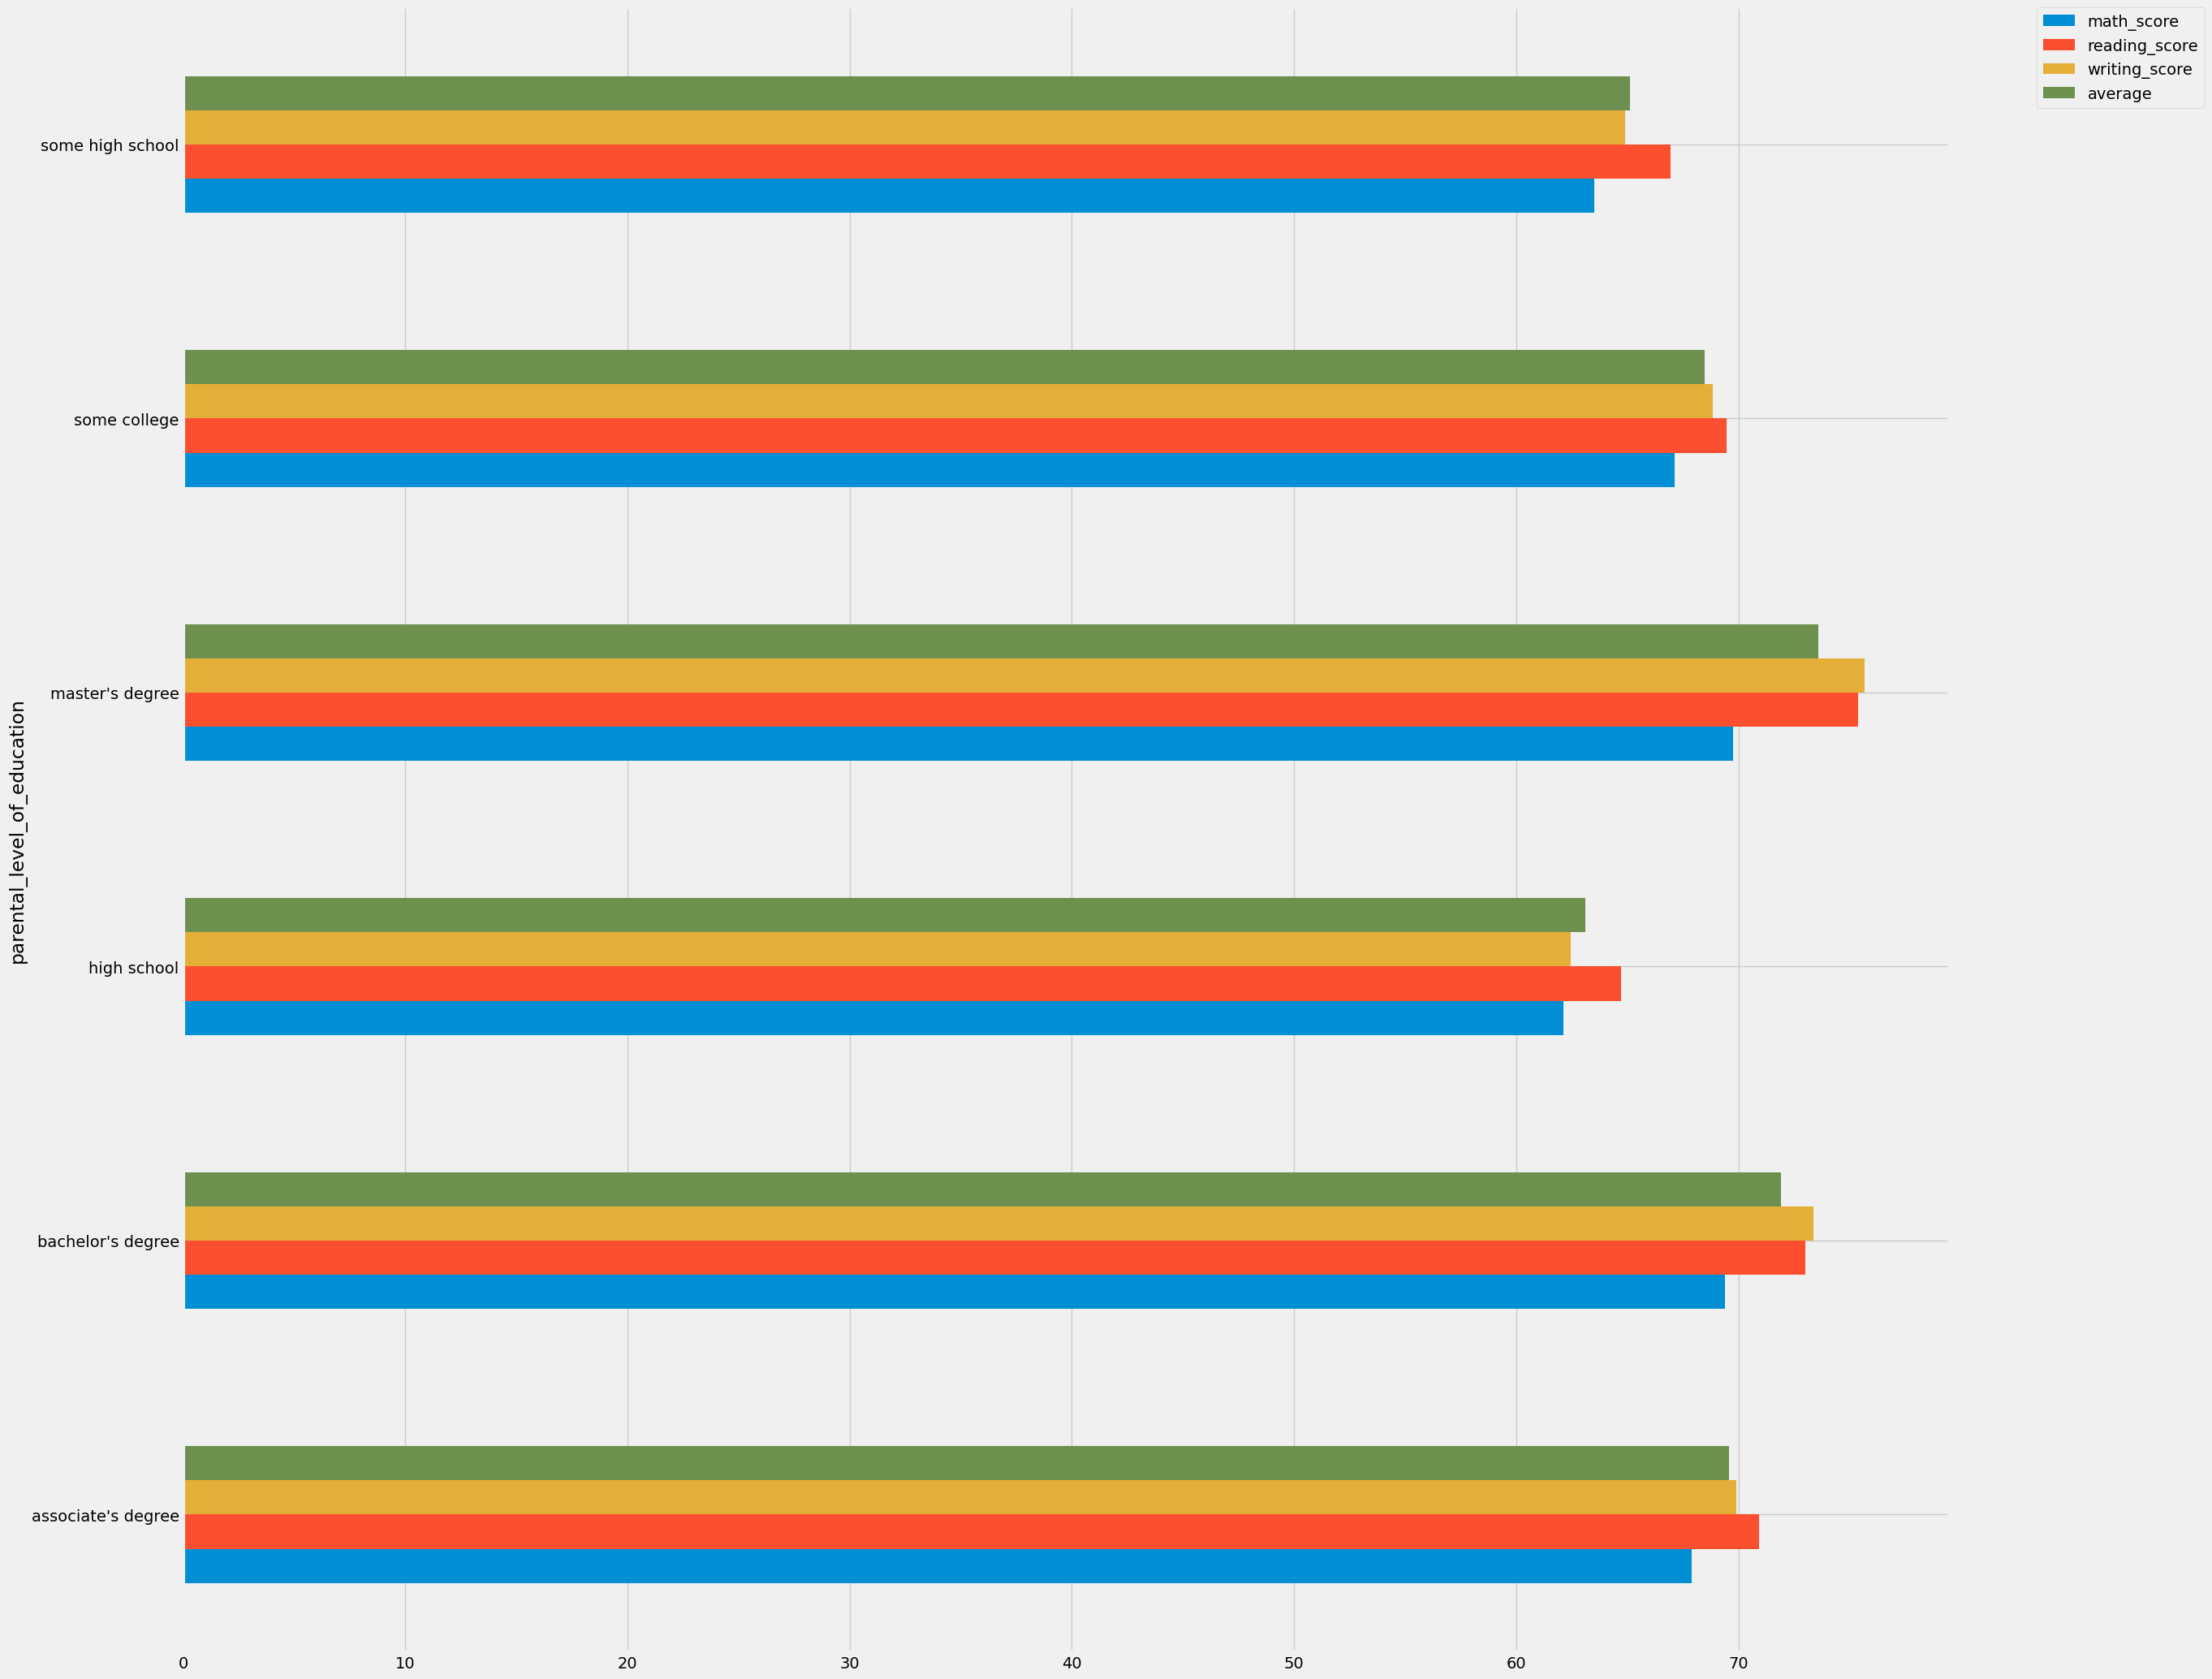

In [64]:
df.groupby(['parental_level_of_education'])[['math_score', 'reading_score', 'writing_score', 'average']].agg('mean').plot(kind='barh',figsize=(25,25))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

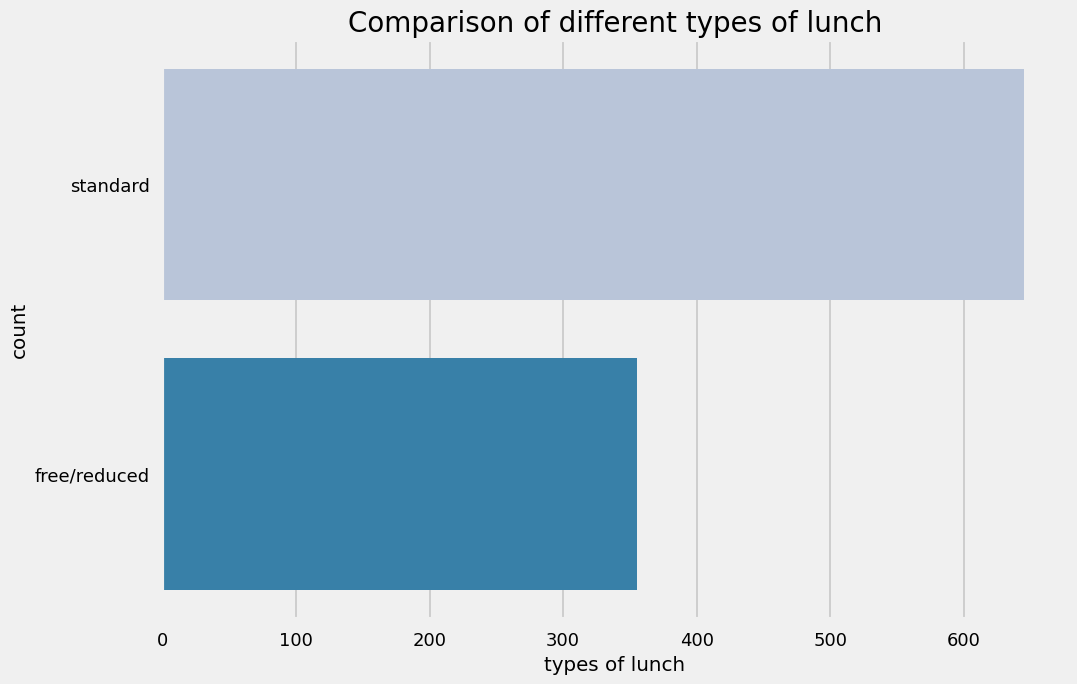

In [65]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

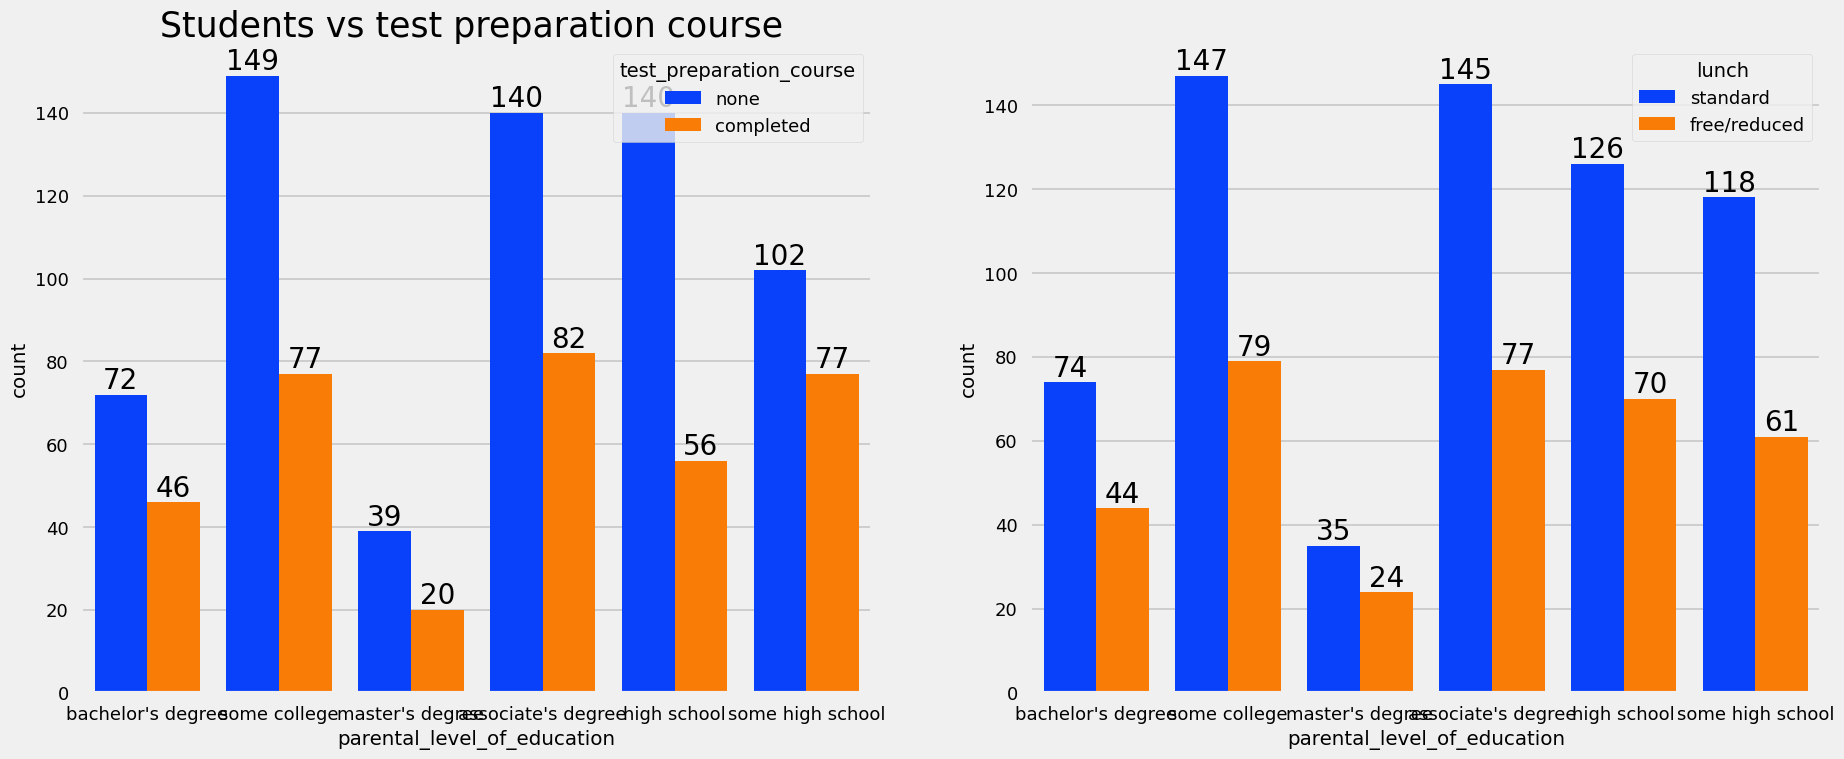

In [68]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

<Axes: xlabel='lunch', ylabel='writing_score'>

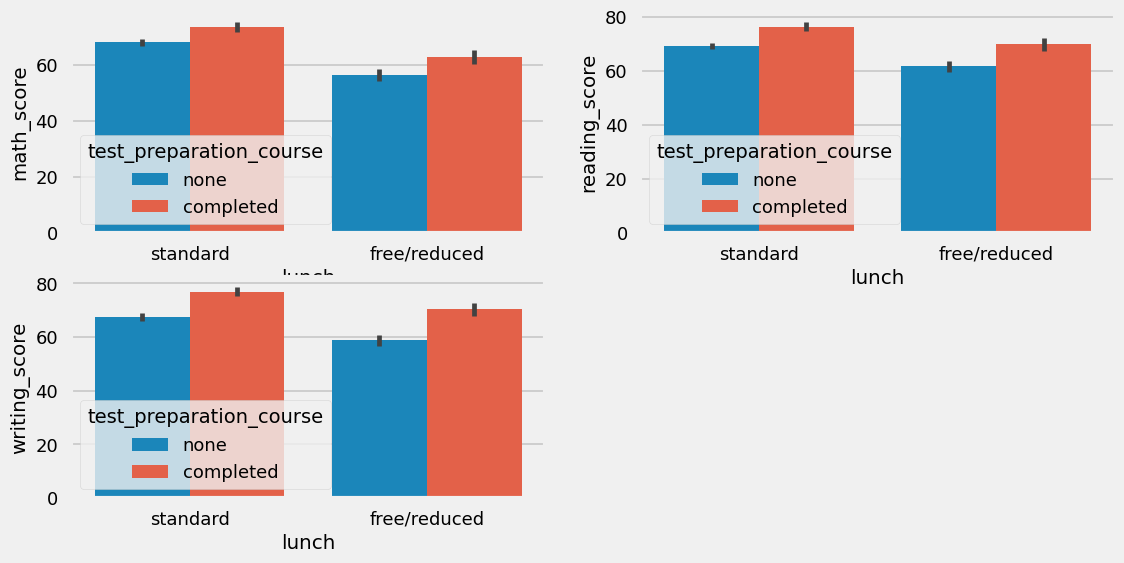

In [70]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

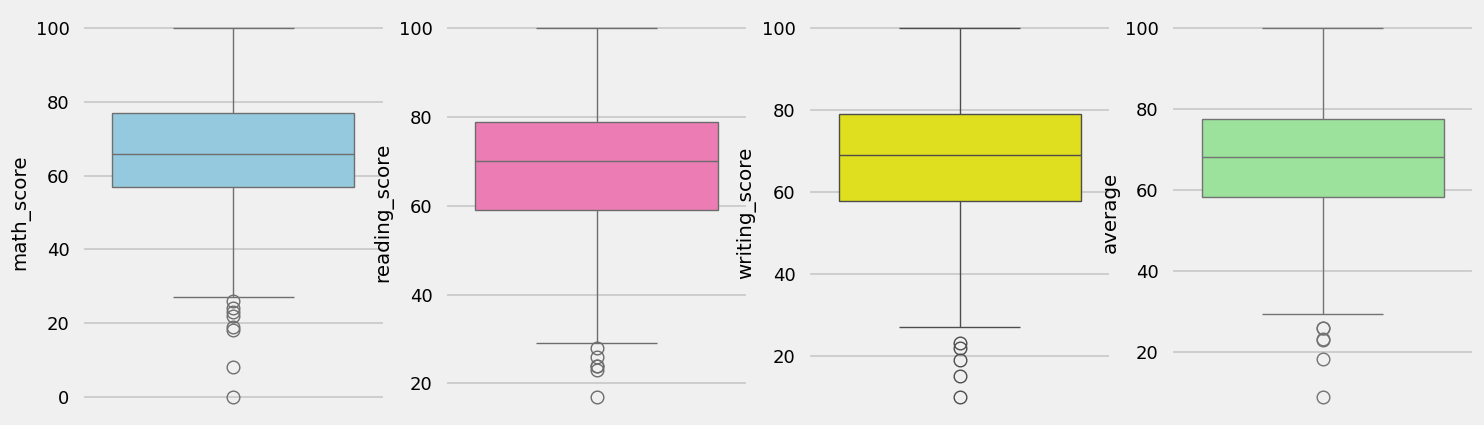

In [72]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

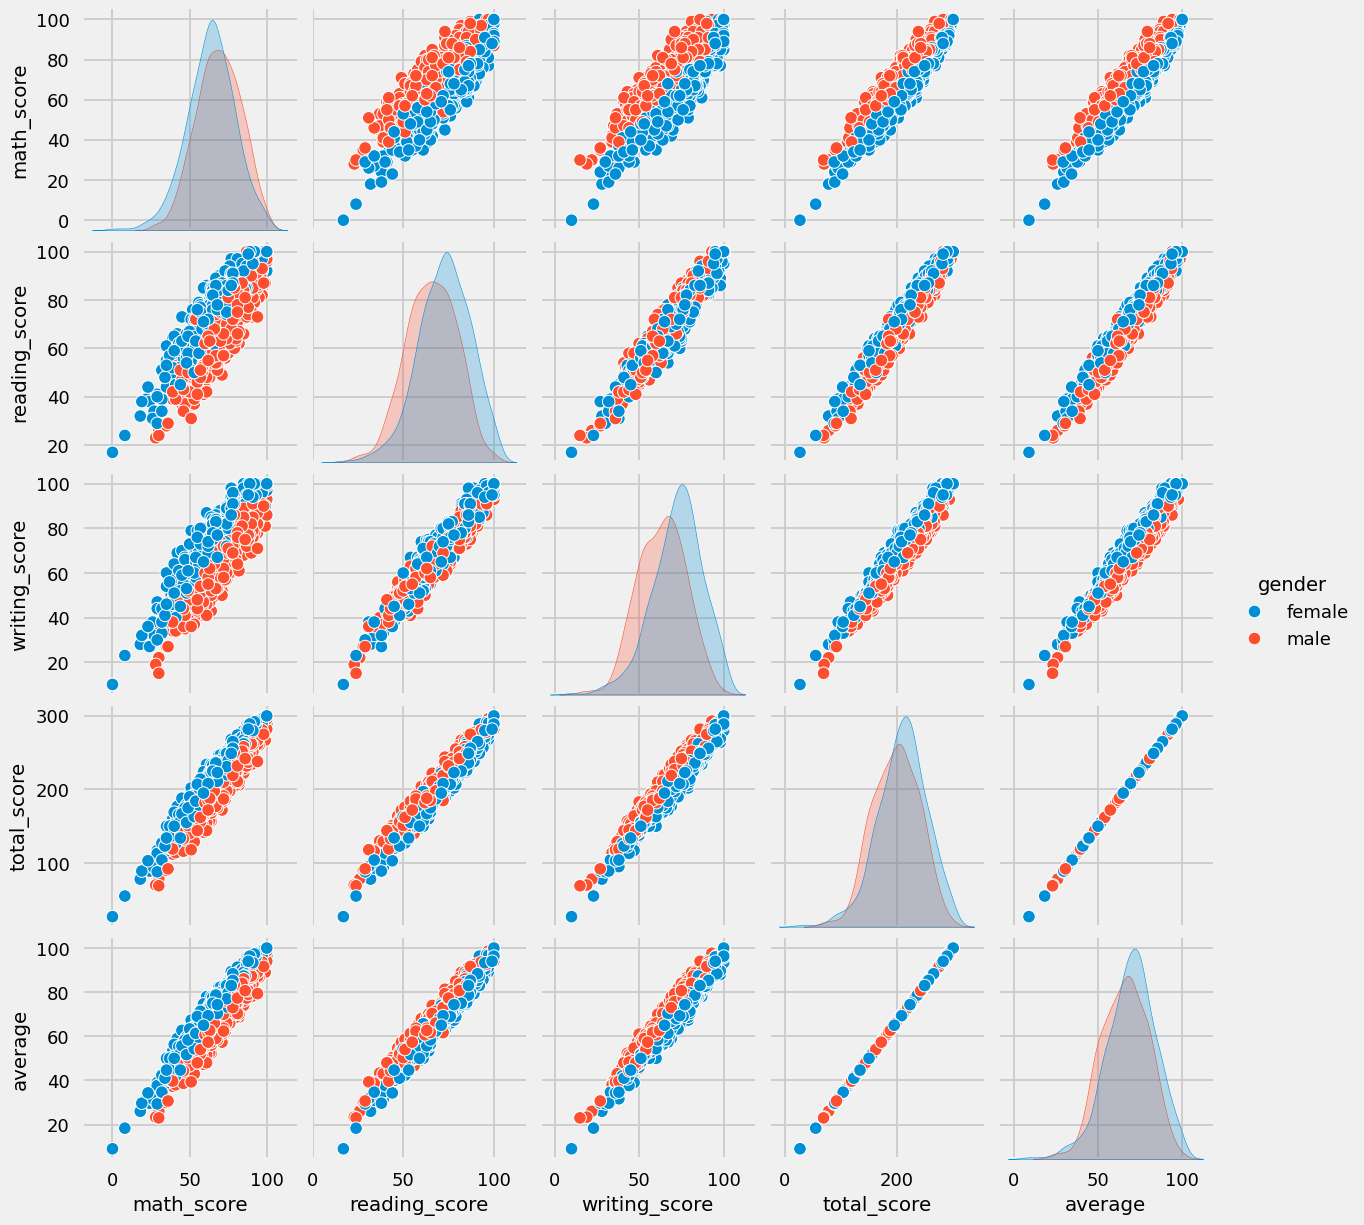

In [73]:
sns.pairplot(df,hue = 'gender')
plt.show()